In [1]:
# Some steps required until these Python modules are properly installed...
import sys
sys.path.append('../Modules')
sys.path.append('../../../../veneer-py')
# Get the Source scripting components (veneer) and GBR specific stuff
import veneer
import gbr
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#gbr.init('E:/Beckers/Output/Scenario 1/')
gbr.init('F:/aa_Source_Temp/RC2015/Model Outputs/Fitzroy RC2015/')

gbr.available()

['Baseline_3818_UpdatedHydro', 'Fitzroy RC2015_1_FPSetVel']

In [3]:
results = gbr.Results('Fitzroy RC2015_1_FPSetVel')

In [4]:
site = 'GS130004A'

In [10]:
observedTS = pd.read_csv('F:\\aa_Source_Temp\\RC2015\\Observed\\'+site+'_Observed_kilograms.csv',index_col = 0, parse_dates = True, dayfirst = True)

In [11]:
observedTS.columns

Index(['N_Particulate', 'P_Particulate', 'Sediment - Fine'], dtype='object')

In [12]:
predictedDir = 'F:/aa_Source_Temp/RC2015/Model Outputs/Fitzroy RC2015/'+'Fitzroy RC2015_1_FPSetVel'+'/TimeSeries'

In [13]:
constituent = observedTS.columns[0]

In [18]:
def read_predicted_TS (constituent, site):
    return pd.read_csv(predictedDir + '/' + constituent + '/' + constituent + '_' + site + '_kilograms.csv',3 names = ['Date', constituent])

In [25]:
predictedTS = pd.DataFrame([read_predicted_TS(c, site)[c] for c in observedTS.columns]).transpose()

In [26]:
predictedTS

,N_Particulate,P_Particulate,Sediment - Fine
Date,,,
1986-07-01,0.000166,0.000125,0.530148
1986-07-02,0.000160,0.000121,0.510613
1986-07-03,0.000161,0.000130,0.516015
1986-07-04,0.010881,0.014215,35.214764
1986-07-05,0.112492,0.133209,342.220392
1986-07-06,0.154008,0.172919,447.465783
1986-07-07,0.164084,0.181241,462.660804
1986-07-08,0.242698,0.274927,690.862251
1986-07-09,0.236177,0.263017,657.643508


In [27]:
def nse(obs, pred):
    numerator = ((obs - pred)**2).sum()/len(obs)
    denominator = ((obs - obs.mean())**2).sum()/len(obs)
    
    
    return 1 - numerator / denominator

In [28]:
nse(observedTS, predictedTS)

N_Particulate     -0.040554
P_Particulate     -0.039383
Sediment - Fine   -0.038036
dtype: float64

In [29]:
nse(observedTS.N_Particulate, predictedTS.N_Particulate)

-0.04055378450001279

In [77]:
%xmode Verbose
Timeclass = pd.read_csv("E:/timeseries_class.csv",index_col = 1, parse_dates = [1], dayfirst = True, names=["Water_year","date","cat"], skiprows =1)

Exception reporting mode: Verbose


In [78]:
Timeclass.index

DatetimeIndex(['1900-12-31', '1901-01-01', '1901-01-02', '1901-01-03',
               '1901-01-04', '1901-01-05', '1901-01-06', '1901-01-07',
               '1901-01-08', '1901-01-09',
               ...
               '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24',
               '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28',
               '2014-06-29', '2014-06-30'],
              dtype='datetime64[ns]', name='date', length=41455, freq=None)

In [54]:
Timeclass.columns

Index(['Water_year', 'cat'], dtype='object')

In [79]:
#predictedTS[Timeclass.Clare_Event_Number =="b7"]
relevant_timeclass = Timeclass.ix[predictedTS.index]


In [80]:
relevant_timeclass

,Water_year,cat
Date,,
1986-07-01,1986/1987,b1
1986-07-02,1986/1987,b1
1986-07-03,1986/1987,b1
1986-07-04,1986/1987,b1
1986-07-05,1986/1987,b1
1986-07-06,1986/1987,b1
1986-07-07,1986/1987,b1
1986-07-08,1986/1987,b1
1986-07-09,1986/1987,b1


In [84]:
nse(observedTS[relevant_timeclass.cat=='b4'],predictedTS[relevant_timeclass.cat=='b4'])


N_Particulate     -0.122913
P_Particulate     -0.122609
Sediment - Fine   -0.111880
dtype: float64

In [92]:
allBaseflow = relevant_timeclass.cat.apply(lambda x: x.startswith('b'))

In [98]:
observedTS['cat'] = relevant_timeclass.cat

In [104]:
predictedTS['cat'] = relevant_timeclass.cat

In [105]:
def isBaseflow(x):
    return x.startswith('b')

In [110]:
observed_baseflows = observedTS[observedTS['cat'].apply(isBaseflow)].groupby('cat').sum()  # lambda x: x.startswith('b'))]
observed_baseflows

,N_Particulate,P_Particulate,Sediment - Fine
cat,,,
b1,696238.766952,457980.834784,4.150301e+08
b10,41106241.422658,24232935.917550,8.484760e+10
b11,3965989.450440,2161993.136980,8.552901e+09
b12,952429.583576,606303.551493,1.044780e+09
b13,2454334.444313,1763905.833873,2.541833e+09
b14,11404402.951031,7441411.557296,2.249126e+10
b15,1531103.301898,917406.037708,2.875561e+09
b17,1005198.681479,646597.015823,1.814775e+09
b18,2495402.156606,1433017.463040,4.378634e+09


In [111]:
predicted_baseflows = predictedTS[predictedTS['cat'].apply(isBaseflow)].groupby('cat').sum()  # lambda x: x.startswith('b'))]
predicted_baseflows

,N_Particulate,P_Particulate,Sediment - Fine
cat,,,
b1,114642.072236,70144.417075,17279439.362390
b10,152046.727844,91648.917037,21025956.835924
b11,27399.620778,17037.823469,4829030.617207
b12,87462.115781,52908.537433,11402318.499493
b13,80455.688736,51695.021446,24875256.410098
b14,142958.875595,86861.913198,20539717.046356
b15,57768.021381,34782.013919,7395954.468689
b17,41842.551164,25398.836893,5887696.772184
b18,65338.801605,39652.473472,8716832.168292


In [113]:
nse(observed_baseflows,predicted_baseflows)

N_Particulate     -0.318880
P_Particulate     -0.310023
Sediment - Fine   -0.290984
dtype: float64

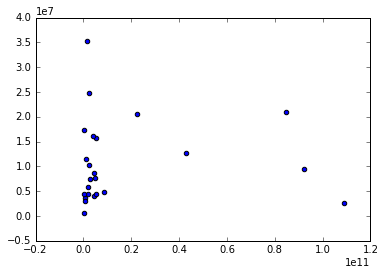

In [114]:
scatter(observed_baseflows['Sediment - Fine'],predicted_baseflows['Sediment - Fine'])

In [55]:
Timeclass.index

Index(['3/01/1900', '4/01/1900', '5/01/1900', '6/01/1900', '7/01/1900',
       '8/01/1900', '9/01/1900', '10/01/1900', '11/01/1900', '12/01/1900',
       ...
       '21/06/2014', '22/06/2014', '23/06/2014', '24/06/2014', '25/06/2014',
       '26/06/2014', '27/06/2014', '28/06/2014', '29/06/2014', '30/06/2014'],
      dtype='object', name='date', length=41820)